In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
#We'll be using the wine dataset which is available as a part of the scikit-learn library. We'll load the dataset as pandas dataframe. The wine dataset has a measurement of ingredients of wine for three different types of wines. We'll be using this dataset from various angles to draw 
#charts and show a connection between them.

In [3]:
from sklearn.datasets import load_wine

wine = load_wine()

wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)

wine_df["WineType"] = [wine.target_names[typ] for typ in wine.target]

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WineType
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [4]:
#Below we have created a dataset with average ingredient measurement per wine type. We grouped the dataset first on wine type
#and then have taken an average of each row to get it.

In [5]:
avg_wine_df = wine_df.groupby(by=["WineType"]).mean()
avg_wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
WineType,,,,,,,,,,,,,
class_0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
class_1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
class_2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [6]:
#Below we have created another dataframe that simply has sample count per wine type data.

In [7]:
wine_cnt = wine_df.groupby(by=["WineType"]).count()[["alcohol"]].rename(columns={"alcohol":"Count"})
wine_cnt


,Count
WineType,
class_0,59
class_1,71
class_2,48


In [8]:
#The first example that we'll use to demonstrate connection is a group of bar and a pie chart.

#The stacked bar chart shows the distribution of samples per wine category. The pie chart shows the distribution of important 
#ingredients for the selected wine category which is Wine class 1 in this case.

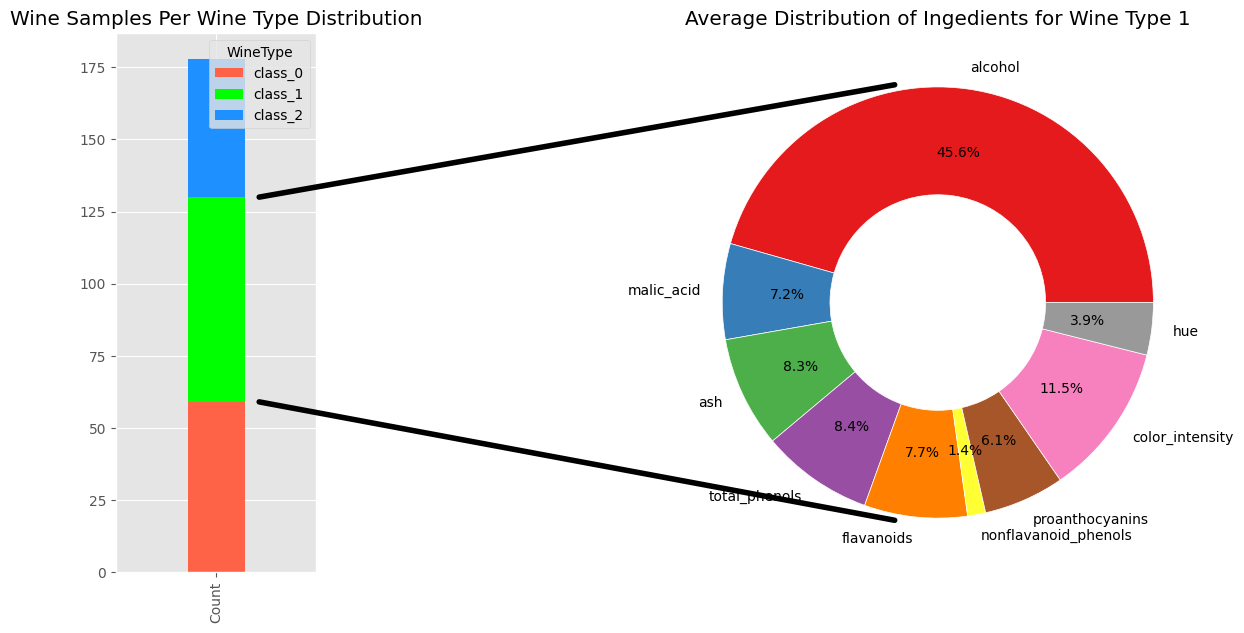

In [9]:
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec

with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(15,7))

    gs = GridSpec(nrows=1, ncols=5)

    ## Bar Chart Logic
    ax1 = fig.add_subplot(gs[:1])

    wine_cnt.T.plot.bar(y=[0,1,2],
                        stacked=True,
                        color=["tomato", "lime", "dodgerblue"],
                        width=0.2, ax=ax1)

    plt.title("Wine Samples Per Wine Type Distribution")

    ## Pie Chart Logic
    ax2 = fig.add_subplot(gs[2:])
    cols = avg_wine_df.drop(columns=["proline", "magnesium", "alcalinity_of_ash", "od280/od315_of_diluted_wines"]).columns

    ax2.pie(x=avg_wine_df[cols].loc["class_1"], labels=avg_wine_df[cols].columns,
            wedgeprops=dict(width=0.5, edgecolor="w"),
            colors=plt.cm.Set1.colors,
            autopct="%.1f%%", pctdistance=0.7,
            )

    plt.title("Average Distribution of Ingedients for Wine Type 1")

    ## Top Connection line between Charts

    con_top = ConnectionPatch(xyA=(-0.2, 1.01),
                          xyB=(0.15, wine_cnt.loc["class_0"].Count+wine_cnt.loc["class_1"].Count),
                          coordsA="data", coordsB="data",
                          axesA=ax2, axesB=ax1,
                          color="black", linewidth=4)

    ax2.add_artist(con_top)

    ## Bottom Connection line between Charts

    con_bottom = ConnectionPatch(xyA=(-0.2, -1.01),
                          xyB=(0.15, wine_cnt.loc["class_0"].Count),
                          coordsA="data", coordsB="data",
                          axesA=ax2, axesB=ax1,
                          color="black", linewidth=4)

    ax2.add_artist(con_bottom)

In [10]:
#Example 2
#The second example that we have created for an explanation of the connection line consists of a stacked bar chart and 
#a horizontal bar chart. The stacked bar chart is created the same way as the previous step. The second horizontal bar 
#chart is created using the same data as that of the pie chart from the previous step. It depicts the average ingredients per wine class 1.

#We have followed the same steps as the previous example to create a connection line between two charts. The only difference
#this time is the selection of points on the second horizontal bar chart.

In [13]:
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(15,7))

    gs = GridSpec(nrows=1, ncols=6)

    ## Bar Chart Logic
    ax1 = fig.add_subplot(gs[:1])

    wine_cnt.T.plot.bar(y=[0,1,2],
                        stacked=True,
                        color=["tomato", "lime", "dodgerblue"],
                        width=0.2, ax=ax1)

    plt.title("Wine Samples Per Wine Type Distribution")

    ## 2nd Bar Chart
    ax2 = fig.add_subplot(gs[3:])

    cols = avg_wine_df.drop(columns=["proline", "magnesium", "alcalinity_of_ash", "od280/od315_of_diluted_wines"]).columns
    avg_wine_df[cols].loc["class_1"].plot.barh(ax=ax2,
                                      width=0.9,
                                      color=plt.cm.Set1.colors,
                                      title="Average Ingredients Per Wine Type 1")


    ## Top Connection line between Charts

    con_top = ConnectionPatch(xyA=(0, 8),
                          xyB=(0.15, wine_cnt.loc["class_0"].Count+wine_cnt.loc["class_1"].Count),
                          coordsA="data", coordsB="data",
                          axesA=ax2, axesB=ax1,
                          color="black", linewidth=4, alpha=0.5)

    ax2.add_artist(con_top)

    ## Bottom Connection line between Charts

    con_bottom = ConnectionPatch(xyA=(0, 0),
                          xyB=(0.15, wine_cnt.loc["class_0"].Count),
                          coordsA="data", coordsB="data",
                          axesA=ax2, axesB=ax1,
                          color="black", linewidth=4, alpha=0.5)

    ax2.add_artist(con_bottom)

In [14]:
#example 3
#The third example that we'll be using for demonstrating the connection line between the two chart consist of two pie chart.
#The first pie chart represents the distribution of samples per wine category in the total dataset. We have modified the 
#first pie chart so that it starts the first patch of the pie chart from angle 360 which generally starts from 0. 
#This is done in order to bring the class 0 patch to the front. The second pie chart is the same as our first
#example which shows the average ingredient distribution per wine class 0.

#The tricky part this time lies in finding out points in the first pie chart to start line from
#endpoints of a patch of wine class 0. In order to find out the starting point for a first and 
#second line from the first pie chart, we have access to the 0th patch of a pie chart which refers
#to a patch of wine class 0 in a pie chart. We have then retrieved attributes theta1, theta2, center,
#and r of the chart. The theta1 and theta2 refer to the starting and ending angle of the wine class 0
#patch. The center and r refer to the center and radius of the pie chart. We have then used these 
#values to retrieve x and y coordinates of points.

#All other things are almost the same as the previous charts. The main trick lies in calculating the starting points of lines from the first pier chart.

In [16]:
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(15,7))

    gs = GridSpec(nrows=1, ncols=6)

    ## First Pie Chart Logic
    ax1 = fig.add_subplot(gs[:2])
    ax1.pie(x=wine_cnt["Count"], labels=wine_cnt.index,
            colors=["tomato", "lime", "dodgerblue"],
            wedgeprops=dict(width=0.6, edgecolor="w"),
            autopct="%.1f%%", pctdistance=0.7,
            startangle=300
            )

    plt.title("Samples Per Wine Type Distribution")

    ## 2nd Pie Chart Logic
    ax2 = fig.add_subplot(gs[3:])
    cols = avg_wine_df.drop(columns=["proline", "magnesium", "alcalinity_of_ash", "od280/od315_of_diluted_wines"]).columns

    ax2.pie(x=avg_wine_df[cols].loc["class_0"], labels=avg_wine_df[cols].columns,
            wedgeprops=dict(width=0.5, edgecolor="w"),
            colors=plt.cm.Set1.colors,
            autopct="%.1f%%", pctdistance=0.75,
            )

    plt.title("Average Distribution of Ingedients for Wine Type 0")


    ## Top Connection line between Charts
    ## Logic to calculate x,y coord of 0 wine class wedge
    theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
    center, r = ax1.patches[0].center, ax1.patches[0].r
    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = np.sin(np.pi / 180 * theta2) + center[1]

    con_top = ConnectionPatch(xyA=(-0.2, 1.01),
                          xyB=(x+0.1, y),
                          coordsA="data", coordsB="data",
                          axesA=ax2, axesB=ax1,
                          color="black", linewidth=4, alpha=0.5)

    ax2.add_artist(con_top)

    ## Bottom Connection line between Charts
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = np.sin(np.pi / 180 * theta1) + center[1]

    con_bottom = ConnectionPatch(xyA=(-0.2, -1.01),
                          xyB=(x+0.1, y),
                          coordsA="data", coordsB="data",
                          axesA=ax2, axesB=ax1,
                          color="black", linewidth=4, alpha=0.5)

    ax2.add_artist(con_bottom)

In [17]:
#Example 4
#The fourth example that we have used for explaining a connection line between two chart consist 
#of a pie chart and a stacked bar chart. The pie chart is the same as that of the previous step 
#explaining sample distribution per wine type in the dataset. The stacked bar chart represents 
#the average distribution of ingredients per wine class 0.

#The calculation of the starting points of both lines is the same as that of the previous step.
#The ending point of both lines is also self-explanatory.

In [18]:
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(15,8))

    gs = GridSpec(nrows=1, ncols=5)

    ## Pie Chart Logic
    ax1 = fig.add_subplot(gs[:2])
    ax1.pie(x=wine_cnt["Count"], labels=wine_cnt.index,
            colors=["tomato", "lime", "dodgerblue"],
            wedgeprops=dict(width=0.6, edgecolor="w"),
            autopct="%.1f%%", pctdistance=0.7,
            startangle=300
            )

    plt.title("Samples Per Wine Type Distribution")

    ## Stacked Bar Chart
    ax2 = fig.add_subplot(gs[4:])

    cols = avg_wine_df.drop(columns=["proline", "magnesium", "alcalinity_of_ash", "od280/od315_of_diluted_wines"]).columns
    intermediate_df = pd.DataFrame(avg_wine_df[cols].loc["class_0"]).T
    intermediate_df.plot.bar(ax=ax2,
                              width=0.8,
                              color=plt.cm.Set1.colors,
                              stacked=True,
                              title="Average Ingredients Per Wine Type 0")


     ## Top Connection line between Charts
    ## Logic to calculate x,y coord of 0 wine class wedge
    theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
    center, r = ax1.patches[0].center, ax1.patches[0].r
    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = np.sin(np.pi / 180 * theta2) + center[1]

    con_top = ConnectionPatch(xyA=(-0.5, intermediate_df.loc["class_0"].sum()),
                          xyB=(x+0.1, y),
                          coordsA="data", coordsB="data",
                          axesA=ax2, axesB=ax1,
                          color="black", linewidth=4)

    ax2.add_artist(con_top)

    ## Bottom Connection line between Charts
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = np.sin(np.pi / 180 * theta1) + center[1]

    con_bottom = ConnectionPatch(xyA=(-0.5, 0),
                          xyB=(x+0.1, y),
                          coordsA="data", coordsB="data",
                          axesA=ax2, axesB=ax1,
                          color="black", linewidth=4)

    ax2.add_artist(con_bottom)

In [19]:
#Example 5
#The fifth example that we'll be using for demonstrating a connection line between two chart consist of stacked bar
#chart from example 1 and box plot showing the concentration of value for various ingredients of wine class 1.

#The logic for drawing a connection line between two charts is inspired by previous examples and self-explanatory.

In [20]:
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(15,7))

    gs = GridSpec(nrows=1, ncols=7)

    ## Bar Chart Logic
    ax1 = fig.add_subplot(gs[:1])

    wine_cnt.T.plot.bar(y=[0,1,2],
                        stacked=True,
                        color=["tomato", "lime", "dodgerblue"],
                        width=0.2, ax=ax1)

    plt.title("Wine Samples Per Wine Type Distribution")

    ## Box Plot
    ax2 = fig.add_subplot(gs[3:])

    cols = avg_wine_df.drop(columns=["proline", "magnesium", "alcalinity_of_ash", "od280/od315_of_diluted_wines"]).columns
    wine_df[wine_df.WineType=="class_1"][cols].plot.box(ax=ax2, color="green",
                                                        title="Ingredients Per Wine Type 1")
    plt.xticks(rotation=90)

    ## Top Connection line between Charts

    con_top = ConnectionPatch(xyA=(0.5, wine_df[wine_df.WineType=="class_1"][cols].values.max()),
                          xyB=(0.15, wine_cnt.loc["class_0"].Count+wine_cnt.loc["class_1"].Count),
                          coordsA="data", coordsB="data",
                          axesA=ax2, axesB=ax1,
                          color="black", linewidth=4, alpha=0.5)

    ax2.add_artist(con_top)

    ## Bottom Connection line between Charts

    con_bottom = ConnectionPatch(xyA=(0.5, 0.5),
                          xyB=(0.15, wine_cnt.loc["class_0"].Count),
                          coordsA="data", coordsB="data",
                          axesA=ax2, axesB=ax1,
                          color="black", linewidth=4, alpha=0.5)

    ax2.add_artist(con_bottom)


In [21]:
#Example 6
#The sixth example for demonstrating a connection line between two charts consists of 
#a pie chart from example 3 and a box plot from example 5.

#The logic for drawing the connection line is inspired by example 3 for finding out the 
#starting points of the line and example 5 for finding out ending points of the line.#

In [22]:
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(16,7))

    gs = GridSpec(nrows=1, ncols=6)

    ## First Pie Chart Logic
    ax1 = fig.add_subplot(gs[:2])
    ax1.pie(x=wine_cnt["Count"], labels=wine_cnt.index,
            colors=["tomato", "lime", "dodgerblue"],
            wedgeprops=dict(width=0.6, edgecolor="w"),
            autopct="%.1f%%", pctdistance=0.7,
            startangle=300
            )

    plt.title("Samples Per Wine Type Distribution")

    ## Box plot logic
    ax2 = fig.add_subplot(gs[3:])

    cols = avg_wine_df.drop(columns=["proline", "magnesium", "alcalinity_of_ash", "od280/od315_of_diluted_wines"]).columns
    wine_df[wine_df.WineType=="class_0"][cols].plot.box(ax=ax2,
                           title="Ingredients Per Wine Type 1")
    plt.xticks(rotation=90)


    ## Top Connection line between Charts
    ## Logic to calculate x,y coord of 0 wine class wedge
    theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
    center, r = ax1.patches[0].center, ax1.patches[0].r
    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = np.sin(np.pi / 180 * theta2) + center[1]

    con_top = ConnectionPatch(xyA=(0.5, wine_df[wine_df.WineType=="class_0"][cols].values.max()),
                          xyB=(x+0.1, y),
                          coordsA="data", coordsB="data",
                          axesA=ax2, axesB=ax1,
                          color="black", linewidth=4)

    ax2.add_artist(con_top)

    ## Bottom Connection line between Charts
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = np.sin(np.pi / 180 * theta1) + center[1]

    con_bottom = ConnectionPatch(xyA=(0.5, 0.0),
                          xyB=(x+0.1, y),
                          coordsA="data", coordsB="data",
                          axesA=ax2, axesB=ax1,
                          color="black", linewidth=4)

    ax2.add_artist(con_bottom)